In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re


In [4]:
df = pd.read_csv('final_df.csv')
df.head()

,Unnamed: 0,attributes,business_id,categories,city,hours,is_open,name,postal_code,review_count,stars_x,cool,date,funny,review_id,stars_y,text,useful,user_id
0,110,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"bars, sports bars, dive bars, burgers, nightli...",phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,85007.0,277,4.0,0,2015-05-11,0,lM_XM7e1nD7d7NJ815inuA,4,cozy neighborhood sports bar w good burgers. l...,2,UfUFjbwLpYCeJrWUWdMYVA
1,111,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"bars, sports bars, dive bars, burgers, nightli...",phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,85007.0,277,4.0,0,2010-08-14,0,ACW_G1G0PG0GNyGUPfI3UA,4,the bad: the bar closes at 10pm. it seems lik...,0,VWDL0VgQ2ivpN3oYhL_WsA
2,112,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"bars, sports bars, dive bars, burgers, nightli...",phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,85007.0,277,4.0,1,2014-07-29,0,KKJa4pRGwq8eO6YCdhjNoA,5,"good food, good vibes, good service. all adds ...",1,SoL4ToJdvxWpGGzxYVA86A
3,113,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"bars, sports bars, dive bars, burgers, nightli...",phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,85007.0,277,4.0,0,2015-11-08,0,zSa_s88VlxYzeiHHTlK6xw,5,my wife and i were referred to this place by a...,0,JIj2V2YaM5_8jVtnkLSZ5g
4,114,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"bars, sports bars, dive bars, burgers, nightli...",phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,85007.0,277,4.0,3,2009-09-24,5,1wYTbfyQ0bfM31nM9c3hsA,3,my boyfriend likes burgers...i don't. not real...,4,BoJQWDp2a9sxUMrlJBTfRA


In [5]:
df = df.drop(["Unnamed: 0", "city", "postal_code"], axis = 1)
df.attributes = df.attributes.str.lower()
df.business_id = df.business_id.str.lower()
df.review_id = df.review_id.str.lower()
df.user_id = df.user_id.str.lower()
df.head()

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,cool,date,funny,review_id,stars_y,text,useful,user_id
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-05-11,0,lm_xm7e1nd7d7nj815inua,4,cozy neighborhood sports bar w good burgers. l...,2,ufufjbwlpycejrwuwdmyva
1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2010-08-14,0,acw_g1g0pg0gnygupfi3ua,4,the bad: the bar closes at 10pm. it seems lik...,0,vwdl0vgq2ivpn3oyhl_wsa
2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,2014-07-29,0,kkja4prgwq8eo6ycdhjnoa,5,"good food, good vibes, good service. all adds ...",1,sol4tojdvxwpggzxyva86a
3,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-11-08,0,zsa_s88vlxyzeihhtlk6xw,5,my wife and i were referred to this place by a...,0,jij2v2yam5_8jvtnklsz5g
4,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,3,2009-09-24,5,1wytbfyq0bfm31nm9c3hsa,3,my boyfriend likes burgers...i don't. not real...,4,bojqwdp2a9sxumrljbtfra


## 1. attributes

In [6]:
dfNoReview = df.iloc[:,0:8]
dfNoReview = dfNoReview.drop_duplicates()
dfNoReview

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0
277,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",ckrmmythxast8f0smezkqg,"event planning & services, soup, salad, mexica...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,manuel's mexican restaurant & cantina - bell rd,230,3.5
507,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",fnadx7ud4miodqlgyhdwsq,"restaurants, chinese","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",1,dragon palace,192,4.0
699,"{'bikeparking': 'true', 'businessacceptscredit...",8zyoquyfhb5yygub97ts3a,"eyelash service, nail salons, hair removal, be...","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",1,centre pointe nails & spa,282,4.0
981,"{'alcohol': 'none', 'ambience': ""{'romantic': ...",e880mgw6c6pjl-n3ejoy_g,"steakhouses, southern, greek, sandwiches, rest...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,zoes kitchen,174,3.5
1155,"{'businessacceptscreditcards': 'true', 'dogsal...",wu4wm-ud1inthg6f3sgzcq,"hotels & travel, hotels, event planning & serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,kimpton palomar hotel phoenix cityscape,283,4.5
1438,{'businessacceptscreditcards': 'true'},t_tcnwwz5nzmrhmboxfdda,"local services, pest control","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...",1,bulwark exterminating,329,4.5
1767,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",yukop3tmdp1pwa7p3zhboq,"restaurants, bars, nightlife, breweries, ameri...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,gordon biersch brewery restaurant,191,3.5
1958,"{'alcohol': 'none', 'ambience': ""{'romantic': ...",ba2tympthr3i7x-6qtcwaw,"restaurants, vietnamese","{'Monday': '10:30-21:0', 'Tuesday': '10:30-21:...",1,tea light cafe,334,4.0
2291,"{'businessacceptsbitcoin': 'false', 'businessa...",awcnjltqwbobq9xxcfpg2g,"carpeting, home services, carpet cleaning, hom...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,paradise carpet cleaning,170,5.0


In [7]:
string = dfNoReview.attributes[0]
# test = string.split("\',")
# display(dfNoReview.head())
# type(string)
dfNoReview['full_bar'] = np.where(dfNoReview.attributes.str.contains("full_bar"), 1, 0)

dfNoReview['ambience_intimate'] = np.where(dfNoReview.attributes.str.contains("intimate\': true"), 1, 0)
dfNoReview['ambience_classy'] = np.where(dfNoReview.attributes.str.contains("classy\': true"), 1, 0)
dfNoReview['ambience_hipster'] = np.where(dfNoReview.attributes.str.contains("hipster\': true"), 1, 0)
dfNoReview['ambience_divey'] = np.where(dfNoReview.attributes.str.contains("divey\': true"), 1, 0)
dfNoReview['ambience_touristy'] = np.where(dfNoReview.attributes.str.contains("touristy\': true"), 1, 0)
dfNoReview['ambience_trendy'] = np.where(dfNoReview.attributes.str.contains("trendy\': true"), 1, 0)
dfNoReview['ambience_upscale'] = np.where(dfNoReview.attributes.str.contains("upscale\': true"), 1, 0)
dfNoReview['ambience_casual'] = np.where(dfNoReview.attributes.str.contains("casual\': true"), 1, 0)

dfNoReview['BYOB'] = np.where(dfNoReview.attributes.str.contains("BYOB\': \'true"), 1, 0)
dfNoReview['accepts_credit_cards'] = np.where(dfNoReview.attributes.str.contains("BusinessAcceptsCreditCards\': \'true"), 1, 0)
dfNoReview['caters'] = np.where(dfNoReview.attributes.str.contains("Caters\': \'true"), 1, 0)
dfNoReview['corkage'] = np.where(dfNoReview.attributes.str.contains("Corkage\': \'true"), 1, 0)
dfNoReview['drivethru'] = np.where(dfNoReview.attributes.str.contains("DriveThru\': \'true"), 1, 0)
dfNoReview['good_for_dancing'] = np.where(dfNoReview.attributes.str.contains("GoodForDancing\': \'true"), 1, 0)
dfNoReview['good_for_kids'] = np.where(dfNoReview.attributes.str.contains("GoodForKids\': \'true"), 1, 0)
dfNoReview['happy_hour'] = np.where(dfNoReview.attributes.str.contains("HappyHour\': \'true"), 1, 0)
dfNoReview['has_tv'] = np.where(dfNoReview.attributes.str.contains("HasTV\': \'true"), 1, 0)
dfNoReview['outdoor_seating'] = np.where(dfNoReview.attributes.str.contains("OutdoorSeating\': \'true"), 1, 0)
dfNoReview['casual_attire'] = np.where(dfNoReview.attributes.str.contains("RestaurantsAttire\': \'casual"), 1, 0)
dfNoReview['delivery'] = np.where(dfNoReview.attributes.str.contains("RestaurantsDelivery\': \'True"), 1, 0)
dfNoReview['goodForGroups'] = np.where(dfNoReview.attributes.str.contains("RestaurantsGoodForGroups\': \'true"), 1, 0)
dfNoReview['reservations'] = np.where(dfNoReview.attributes.str.contains("RestaurantsReservations\': \'true"), 1, 0)
dfNoReview['tableservice'] = np.where(dfNoReview.attributes.str.contains("RestaurantsTableService\': \'true"), 1, 0)
dfNoReview['takeout'] = np.where(dfNoReview.attributes.str.contains("RestaurantsTakeOut\': \'true"), 1, 0)
dfNoReview['bike_parking'] = np.where(dfNoReview.attributes.str.contains("BikeParking\': true"), 1, 0)
dfNoReview['freeWifi'] = np.where(dfNoReview.attributes.str.contains("WiFi\': \'free"), 1, 0)
dfNoReview['wheelchair_access'] = np.where(dfNoReview.attributes.str.contains("WheelchairAccessible\': \'true"), 1, 0)

dfNoReview['parking_garage'] = np.where(dfNoReview.attributes.str.contains("garage\': true"), 1, 0)
dfNoReview['parking_street'] = np.where(dfNoReview.attributes.str.contains("street\': true"), 1, 0)
dfNoReview['parking_validated'] = np.where(dfNoReview.attributes.str.contains("validated\': true"), 1, 0)
dfNoReview['parking_lot'] = np.where(dfNoReview.attributes.str.contains("lot\': true"), 1, 0)
dfNoReview['parking_valet'] = np.where(dfNoReview.attributes.str.contains("valet\': true"), 1, 0)

dfNoReview['casual_attire'] = np.where(dfNoReview.attributes.str.contains("RestaurantsAttire\': \'casual"), 1, 0)
# 

dfNoReview['good_for_dessert'] = np.where(dfNoReview.attributes.str.contains("dessert\': true"), 1, 0)
dfNoReview['good_for_latenight'] = np.where(dfNoReview.attributes.str.contains("latenight\': true"), 1, 0)
dfNoReview['good_for_lunch'] = np.where(dfNoReview.attributes.str.contains("lunch\': true"), 1, 0)
dfNoReview['good_for_dinner'] = np.where(dfNoReview.attributes.str.contains("dinner\': true"), 1, 0)
dfNoReview['good_for_breakfast'] = np.where(dfNoReview.attributes.str.contains("breakfast\': true"), 1, 0)
dfNoReview['good_for_brunch'] = np.where(dfNoReview.attributes.str.contains("brunch\': true"), 1, 0)

dfNoReview.head()

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,full_bar,ambience_intimate,...,parking_street,parking_validated,parking_lot,parking_valet,good_for_dessert,good_for_latenight,good_for_lunch,good_for_dinner,good_for_breakfast,good_for_brunch
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,0,...,0,0,1,0,0,0,1,1,0,0
277,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",ckrmmythxast8f0smezkqg,"event planning & services, soup, salad, mexica...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,manuel's mexican restaurant & cantina - bell rd,230,3.5,1,0,...,0,0,1,0,0,0,1,1,0,0
507,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",fnadx7ud4miodqlgyhdwsq,"restaurants, chinese","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",1,dragon palace,192,4.0,1,0,...,0,0,1,0,0,0,1,1,0,0
699,"{'bikeparking': 'true', 'businessacceptscredit...",8zyoquyfhb5yygub97ts3a,"eyelash service, nail salons, hair removal, be...","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",1,centre pointe nails & spa,282,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
981,"{'alcohol': 'none', 'ambience': ""{'romantic': ...",e880mgw6c6pjl-n3ejoy_g,"steakhouses, southern, greek, sandwiches, rest...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,zoes kitchen,174,3.5,0,0,...,0,0,1,0,0,0,1,0,0,0


## 2. name and business id dont match

In [18]:
len(df.name.unique())

823

In [19]:
len(df.business_id.unique())

881

In [53]:
df.groupby(["name", "business_id"]).count()

,,attributes,categories,hours,is_open,review_count,stars_x,cool,date,funny,review_id,stars_y,text,useful,user_id,new_date,year,month,day_of_week,day_of_month
name,business_id,,,,,,,,,,,,,,,,,,,
$59 rooter & plumbing service,v-igskrmdg0sa1x1mj19ig,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
1000 degrees neapolitan pizzeria,xf4w6wg1jovfkzlqcxiwgq,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
1130 the restaurant,bs07-hluz0dq06giuwr5mw,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229,229
32 shea,qqcslgmncjp1xwugnokcqa,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644,644
3on smith cafe,h9tjl_ntsan-yszelkkk2w,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216,216
40th street cafe,gqg_z_bqr9lp9oluv659ya,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
5 & diner,nn4zkiztcd7jjhxs-p9tha,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276
5th avenue cafe,yvcihmadamdp_jv7vsbahq,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
a 1 minute key service,po-05-agcvxeme-sbnuikw,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281


In [21]:
len(df.user_id.unique())

129478

## 3. Feature Engineering + EDA

In [5]:
mean_score = df.groupby("name").mean().loc[:,["review_count", "stars_x", "cool", "funny", "stars_y", "useful"]]
mean_score.head()

,review_count,stars_x,cool,funny,stars_y,useful
name,,,,,,
$59 rooter & plumbing service,286.0,5.0,0.344948,0.198606,4.891986,1.114983
1000 degrees neapolitan pizzeria,196.0,4.5,0.336735,0.193878,4.408163,0.607143
1130 the restaurant,229.0,3.5,0.812227,0.698690,3.515284,1.257642
32 shea,645.0,4.0,0.523292,0.486025,4.131988,1.352484
3on smith cafe,216.0,4.5,0.259259,0.148148,4.490741,0.597222


/Users/amandawu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


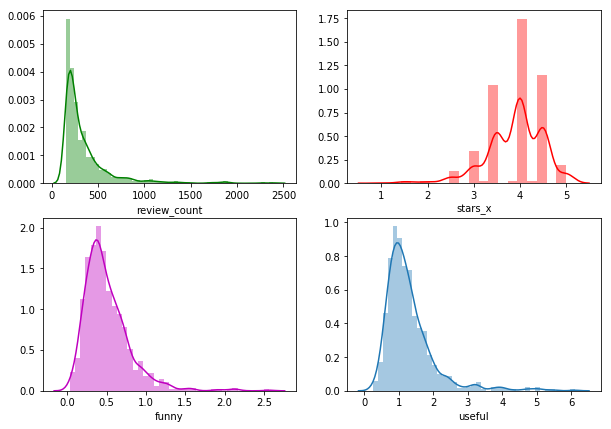

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
sns.distplot(mean_score.review_count, color="g",ax=ax[0,0])
sns.distplot(mean_score.stars_x, color="r",ax=ax[0,1])
sns.distplot(mean_score.funny, color="m",ax=ax[1,0])
sns.distplot(mean_score.useful, ax=ax[1,1])


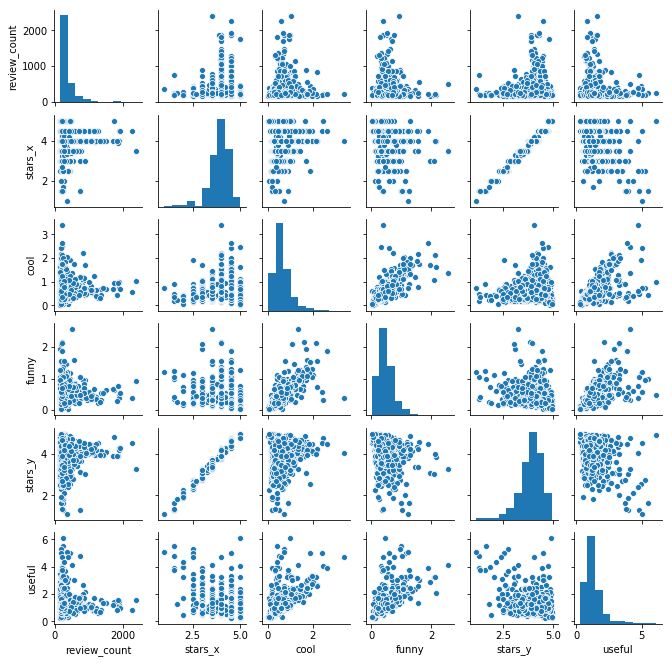

In [14]:
g=sns.pairplot(mean_score)
g.fig.set_size_inches(9,9)

In [7]:
from datetime import datetime
df['new_date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['new_date'].dt.year, df['new_date'].dt.month
df['day_of_month'] = df['new_date'].dt.day
df['day_of_week']= df['new_date'].dt.dayofweek
df["text_length"] = [len(df.text[i]) for i in np.arange(len(df))]
df.head()

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,cool,date,...,stars_y,text,useful,user_id,new_date,year,month,day_of_month,day_of_week,text_length
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-05-11,...,4,cozy neighborhood sports bar w good burgers. l...,2,ufufjbwlpycejrwuwdmyva,2015-05-11,2015,5,11,0,152
1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2010-08-14,...,4,the bad: the bar closes at 10pm. it seems lik...,0,vwdl0vgq2ivpn3oyhl_wsa,2010-08-14,2010,8,14,5,440
2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,2014-07-29,...,5,"good food, good vibes, good service. all adds ...",1,sol4tojdvxwpggzxyva86a,2014-07-29,2014,7,29,1,282
3,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-11-08,...,5,my wife and i were referred to this place by a...,0,jij2v2yam5_8jvtnklsz5g,2015-11-08,2015,11,8,6,359
4,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,3,2009-09-24,...,3,my boyfriend likes burgers...i don't. not real...,4,bojqwdp2a9sxumrljbtfra,2009-09-24,2009,9,24,3,2832


Text(0,0.5,'Number of Review')

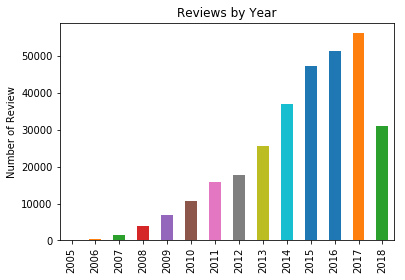

In [25]:
df.year.value_counts().sort_index().plot(kind="bar")
plt.title("Reviews by Year")
plt.ylabel("Number of Review")

Text(0,0.5,'Number of Review')

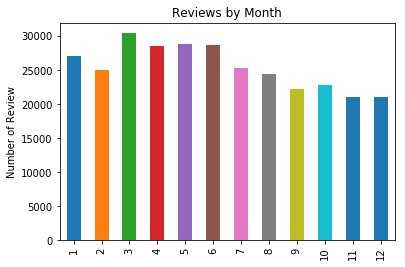

In [26]:
df.month.value_counts().sort_index().plot(kind="bar")
plt.title("Reviews by Month")
plt.ylabel("Number of Review")

Text(0,0.5,'Number of Review')

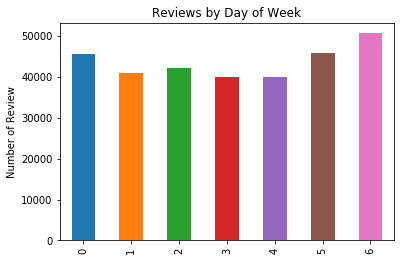

In [39]:
df.day_of_week.value_counts().sort_index().plot(kind="bar")
plt.title("Reviews by Day of Week")
plt.ylabel("Number of Review")

Text(0,0.5,'Number of Review')

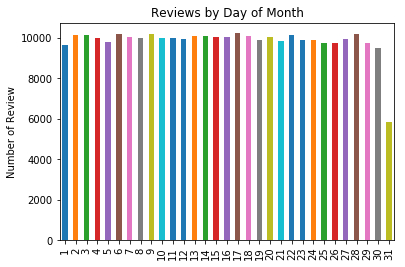

In [40]:
df.day_of_month.value_counts().sort_index().plot(kind="bar")
plt.title("Reviews by Day of Month")
plt.ylabel("Number of Review")

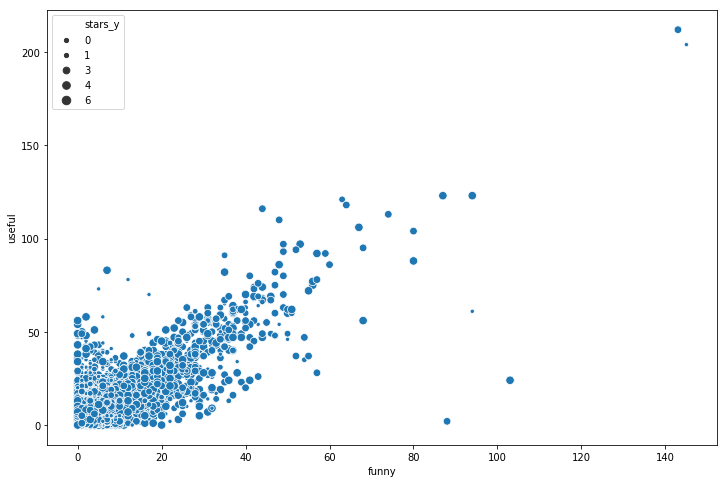

In [165]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="funny", y="useful", size="stars_y",data=df)

## 4. NLP

In [42]:
df.text[0]

'cozy neighborhood sports bar w good burgers. love the condiment bar, the prices, and the old school feel of the place. nice patio too. def goin back....'

In [8]:
df_text = df.loc[:, ["business_id", "name","review_id", "stars_x", "stars_y","useful","text", "text_length"]]
df_text.head()

/Users/amandawu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,business_id,name,review_id,stars_x,stars_y,useful,text,text_length
0,_c3ixq9jykxhlub0czi0ug,original hamburger works,lm_xm7e1nd7d7nj815inua,4.0,4,2,cozy neighborhood sports bar w good burgers. l...,NaN
1,_c3ixq9jykxhlub0czi0ug,original hamburger works,acw_g1g0pg0gnygupfi3ua,4.0,4,0,the bad: the bar closes at 10pm. it seems lik...,NaN
2,_c3ixq9jykxhlub0czi0ug,original hamburger works,kkja4prgwq8eo6ycdhjnoa,4.0,5,1,"good food, good vibes, good service. all adds ...",NaN
3,_c3ixq9jykxhlub0czi0ug,original hamburger works,zsa_s88vlxyzeihhtlk6xw,4.0,5,0,my wife and i were referred to this place by a...,NaN
4,_c3ixq9jykxhlub0czi0ug,original hamburger works,1wytbfyq0bfm31nm9c3hsa,4.0,3,4,my boyfriend likes burgers...i don't. not real...,NaN


In [90]:
sent = pd.read_csv("vader_lexicon.txt", sep='\t', header=None).iloc[:, :2]
sent.columns = ["token", "polarity"]
sent.set_index("token", inplace=True)
sent.tail()

,polarity
token,
}:,-2.1
}:(,-2.0
}:),0.4
}:-(,-2.1
}:-),0.3


In [45]:
df.iloc[1,13]

"the bad: the bar closes at 10pm.  it seems like the western, country, wagon-wheel themed bar that you'd like to close down one night while playing some good tunes on the juke box and eating peanuts.  and also the french fries, file those under bad.\n\nthe good: the hamburgers are pretty much delicious.  definitely go for guacamole, and add whatever you want from the topping wagon.\n\ni didn't try one myself, but i hear the cookies are good."

In [46]:
sentiment = []
for review in np.arange(len(df)):
    sentiment.append(sum([sent.loc[i]["polarity"] for i in df.iloc[review,13].split() if i in sent.index]))


In [135]:
sentiment_series=[i for i in np.arange(len(sentiment)) if type(sentiment[i])!= np.float64]

In [144]:
df_text["sentiment"]=sentiment
df_text = df_text.drop(index = sentiment_series)
df_text.head()

,business_id,name,review_id,stars_x,stars_y,useful,text,text_length,sentiment
0,_c3ixq9jykxhlub0czi0ug,original hamburger works,lm_xm7e1nd7d7nj815inua,4.0,4,2,cozy neighborhood sports bar w good burgers. l...,152,6.9
1,_c3ixq9jykxhlub0czi0ug,original hamburger works,acw_g1g0pg0gnygupfi3ua,4.0,4,0,the bad: the bar closes at 10pm. it seems lik...,440,9.9
2,_c3ixq9jykxhlub0czi0ug,original hamburger works,kkja4prgwq8eo6ycdhjnoa,4.0,5,1,"good food, good vibes, good service. all adds ...",282,11.7
3,_c3ixq9jykxhlub0czi0ug,original hamburger works,zsa_s88vlxyzeihhtlk6xw,4.0,5,0,my wife and i were referred to this place by a...,359,13.1
4,_c3ixq9jykxhlub0czi0ug,original hamburger works,1wytbfyq0bfm31nm9c3hsa,4.0,3,4,my boyfriend likes burgers...i don't. not real...,2832,38.1


In [145]:
df_text.to_csv("df_sentiment.csv")

In [9]:
df_text = pd.read_csv("df_sentiment.csv")
df_text.head()

,Unnamed: 0,business_id,name,review_id,stars_x,stars_y,useful,text,text_length,sentiment
0,0,_c3ixq9jykxhlub0czi0ug,original hamburger works,lm_xm7e1nd7d7nj815inua,4.0,4,2,cozy neighborhood sports bar w good burgers. l...,152,6.9
1,1,_c3ixq9jykxhlub0czi0ug,original hamburger works,acw_g1g0pg0gnygupfi3ua,4.0,4,0,the bad: the bar closes at 10pm. it seems lik...,440,9.9
2,2,_c3ixq9jykxhlub0czi0ug,original hamburger works,kkja4prgwq8eo6ycdhjnoa,4.0,5,1,"good food, good vibes, good service. all adds ...",282,11.7
3,3,_c3ixq9jykxhlub0czi0ug,original hamburger works,zsa_s88vlxyzeihhtlk6xw,4.0,5,0,my wife and i were referred to this place by a...,359,13.1
4,4,_c3ixq9jykxhlub0czi0ug,original hamburger works,1wytbfyq0bfm31nm9c3hsa,4.0,3,4,my boyfriend likes burgers...i don't. not real...,2832,38.1


Text(0.5,1,'The Effect of Sentiment & Usefulness on Review Rating')

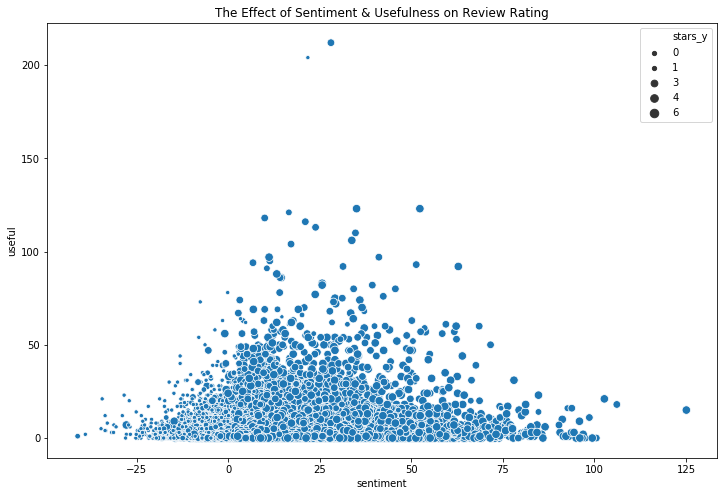

In [147]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="sentiment", y="useful", size="stars_y",data=df_text)
plt.title("The Effect of Sentiment & Usefulness on Review Rating")

Text(0.5,1,'Sentiment vs. Review Rating')

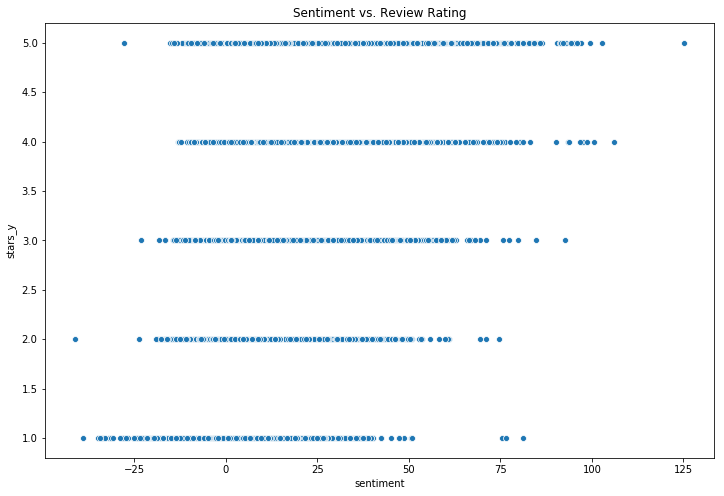

In [141]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="sentiment", y="stars_y", data=df_text)
plt.title("Sentiment vs. Review Rating")

## 5. Initial Modeling

In [209]:
np.arange(8, len(dfNoReview.columns)+1)

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47])

In [11]:
one_hot = dfNoReview.iloc[:, [1,8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,42, 43, 44, 45, 46]]
one_hot.head()

,business_id,full_bar,ambience_intimate,ambience_classy,ambience_hipster,ambience_divey,ambience_touristy,ambience_trendy,ambience_upscale,ambience_casual,...,parking_street,parking_validated,parking_lot,parking_valet,good_for_dessert,good_for_latenight,good_for_lunch,good_for_dinner,good_for_breakfast,good_for_brunch
0,_c3ixq9jykxhlub0czi0ug,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
277,ckrmmythxast8f0smezkqg,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
507,fnadx7ud4miodqlgyhdwsq,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
699,8zyoquyfhb5yygub97ts3a,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
981,e880mgw6c6pjl-n3ejoy_g,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [12]:
merged=df.merge(one_hot, left_on="business_id", right_on="business_id", how="left")
final=merged.merge(df_text[["review_id","sentiment"]],left_on="review_id", right_on="review_id", how="right")
final.head()

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,cool,date,...,parking_validated,parking_lot,parking_valet,good_for_dessert,good_for_latenight,good_for_lunch,good_for_dinner,good_for_breakfast,good_for_brunch,sentiment
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-05-11,...,0,1,0,0,0,1,1,0,0,6.9
1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2010-08-14,...,0,1,0,0,0,1,1,0,0,9.9
2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,2014-07-29,...,0,1,0,0,0,1,1,0,0,11.7
3,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,2015-11-08,...,0,1,0,0,0,1,1,0,0,13.1
4,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,3,2009-09-24,...,0,1,0,0,0,1,1,0,0,38.1


In [220]:
final = pd.read_csv("final.csv")

In [222]:
final.year

0         2015
1         2010
2         2014
3         2015
4         2009
5         2013
6         2015
7         2013
8         2011
9         2014
10        2012
11        2007
12        2016
13        2010
14        2008
15        2009
16        2015
17        2015
18        2009
19        2006
20        2014
21        2015
22        2016
23        2009
24        2009
25        2014
26        2011
27        2016
28        2015
29        2014
          ... 
293168    2012
293169    2013
293170    2018
293171    2016
293172    2016
293173    2017
293174    2017
293175    2018
293176    2017
293177    2015
293178    2016
293179    2010
293180    2017
293181    2015
293182    2015
293183    2014
293184    2014
293185    2017
293186    2016
293187    2016
293188    2018
293189    2016
293190    2015
293191    2009
293192    2015
293193    2017
293194    2010
293195    2018
293196    2017
293197    2016
Name: year, Length: 293198, dtype: int64

In [223]:
from nltk.corpus import stopwords
s=set(stopwords.words("english"))
# temp = final.iloc[0:1, :]
# for txt in temp['text']:
#     print(txt.split())
#     print(filter(lambda w: not w in s, txt.split()))
#     txt = " ".join(a)
# final['text'][0]

In [ ]:
from nltk.stem import PorterStemmer
import re
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()
# temp = final.iloc[0:1, :]
newtxt = []
for txt in final['text']:
    words = word_tokenize(txt)
    temp = []
    for w in words:
        if w in s:
            continue
        temp.append(ps.stem(w))
    temp=re.sub(r'[^\w\s]','',str(temp))
    newtxt.append("".join(temp))
# newtxt=re.sub(r'[^\w\s]','',str(newtxt))
newtxt[0]

In [224]:
final["newtext"]=newtxt
final.head()

,Unnamed: 0,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,cool,...,parking_lot,parking_valet,good_for_dessert,good_for_latenight,good_for_lunch,good_for_dinner,good_for_breakfast,good_for_brunch,sentiment,newtext
0,0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,...,1,0,0,0,1,1,0,0,6.9,cozi neighborhood sport bar w good burger lov...
1,1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,...,1,0,0,0,1,1,0,0,9.9,bad bar close 10pm seem like western countr...
2,2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,...,1,0,0,0,1,1,0,0,11.7,good food good vibe good servic add great s...
3,3,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,0,...,1,0,0,0,1,1,0,0,13.1,wife refer place patio furnitur salesman area ...
4,4,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,3,...,1,0,0,0,1,1,0,0,38.1,boyfriend like burger nt realli nt eat red ...


In [225]:
from collections import Counter
mostFreq = Counter(" ".join(final["newtext"]).split()).most_common(300)
top300 = [tuple for tuple in mostFreq]
top300
# filter(lambda tuple: not tuple[0] in s, top300)

[('nt', 203293),
 ('food', 192008),
 ('place', 187698),
 ('s', 179880),
 ('good', 169261),
 ('great', 156020),
 ('time', 123985),
 ('servic', 116892),
 ('order', 115506),
 ('like', 114698),
 ('go', 109023),
 ('get', 104908),
 ('back', 92500),
 ('one', 92499),
 ('would', 89330),
 ('tri', 84533),
 ('love', 83511),
 ('realli', 77006),
 ('come', 65248),
 ('restaur', 64751),
 ('also', 60809),
 ('us', 60269),
 ('ve', 59176),
 ('wait', 57982),
 ('even', 57886),
 ('best', 57112),
 ('got', 55986),
 ('nice', 55222),
 ('delici', 53486),
 ('drink', 52781),
 ('make', 51929),
 ('menu', 50888),
 ('well', 50521),
 ('look', 50073),
 ('could', 49563),
 ('want', 49455),
 ('m', 48401),
 ('littl', 48067),
 ('amaz', 47530),
 ('pizza', 46656),
 ('chicken', 46599),
 ('alway', 46252),
 ('price', 45928),
 ('came', 45844),
 ('friendli', 45091),
 ('first', 44321),
 ('definit', 43485),
 ('staff', 42520),
 ('eat', 42461),
 ('tabl', 41212),
 ('bar', 40197),
 ('went', 39782),
 ('recommend', 39680),
 ('ask', 39410),
 

In [84]:
# def removestop(tuple):
#     if tuple[0] not in s:
#         print("{} not in s",tuple[0])
#     else:
#         print("asdafsdf")
# #         return tuple[0]

In [146]:
# # type(final.text.str)
# temp = final.iloc[0:1,:]
# a= str(temp['text'])
# a
# for i in range(100):
#     final['{}'.format(mostFreq[i][0])] = final.apply(lambda row: str(row.text).find(mostFreq[i][0]), axis=1)
len(mostFreq)

300

In [226]:
newCommon = []
for tuple in mostFreq:
    if tuple[0] not in s:
        newCommon.append(tuple[0])

# newCommon

s
ve
m
re
ll
d


In [148]:
# common_words = pd.DataFrame({"words":newCommon})
common_words.to_csv("common_words.csv")

In [174]:
final

,Unnamed: 0,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,cool,...,full,close,everyon,item,fantast,week,left,spici,probabl,attent
0,0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,True,False,False,False,False,False,False,False,False
2,2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,True,False,False,False,False,False,False,False,False,False
3,3,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
4,4,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,True,False,False,False,False,False,False,False,False,False
5,5,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
6,6,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
7,7,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
8,8,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False
9,9,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,False,...,False,False,False,False,False,False,False,False,False,False


In [186]:
for i in range(226,len(newCommon)):
    final['{}'.format(newCommon[i])] = final.apply(lambda row: newCommon[i] in row.newtext, axis=1)

In [189]:
final = final.drop(["Unnamed: 0", "attributes", "categories", "hours", "name"], axis =1 )
final.head()

,business_id,is_open,review_count,stars_x,cool,date,funny,review_id,stars_y,text,...,quick,door,sat,least,wife,wo,high,shop,bbq,three
0,_c3ixq9jykxhlub0czi0ug,1,277,4.0,False,2015-05-11,0,lm_xm7e1nd7d7nj815inua,4,cozy neighborhood sports bar w good burgers. l...,...,False,False,False,False,False,False,False,False,False,False
1,_c3ixq9jykxhlub0czi0ug,1,277,4.0,False,2010-08-14,0,acw_g1g0pg0gnygupfi3ua,4,the bad: the bar closes at 10pm. it seems lik...,...,False,False,False,False,False,False,False,False,False,False
2,_c3ixq9jykxhlub0czi0ug,1,277,4.0,False,2014-07-29,0,kkja4prgwq8eo6ycdhjnoa,5,"good food, good vibes, good service. all adds ...",...,False,False,False,False,False,False,False,False,False,False
3,_c3ixq9jykxhlub0czi0ug,1,277,4.0,False,2015-11-08,0,zsa_s88vlxyzeihhtlk6xw,5,my wife and i were referred to this place by a...,...,False,False,False,False,True,False,False,False,False,False
4,_c3ixq9jykxhlub0czi0ug,1,277,4.0,False,2009-09-24,5,1wytbfyq0bfm31nm9c3hsa,3,my boyfriend likes burgers...i don't. not real...,...,False,False,False,False,False,True,False,False,False,False


In [190]:
final.to_csv("final2.csv")

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
final=pd.read_csv("final2.csv")

In [13]:
y=final.stars_y
# y=final.groupby("business_id").mean()[["stars_y"]]
# x=temp
x=final.drop(['Unnamed: 0','business_id',"stars_y", "text", "newtext", "user_id", "review_id", "date", "new_date"], axis =1)
# x = final.iloc[:, [5,7,8, 9,11,15,18,19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
#        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
#        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,62]]

In [14]:
x.columns[:100]

Index(['is_open', 'review_count', 'stars_x', 'cool', 'funny', 'useful', 'year',
       'month', 'day_of_month', 'day_of_week', 'text_length', 'full_bar',
       'ambience_intimate', 'ambience_classy', 'ambience_hipster',
       'ambience_divey', 'ambience_touristy', 'ambience_trendy',
       'ambience_upscale', 'ambience_casual', 'BYOB', 'accepts_credit_cards',
       'caters', 'corkage', 'drivethru', 'good_for_dancing', 'good_for_kids',
       'happy_hour', 'has_tv', 'outdoor_seating', 'casual_attire', 'delivery',
       'goodForGroups', 'reservations', 'tableservice', 'takeout',
       'bike_parking', 'freeWifi', 'wheelchair_access', 'parking_garage',
       'parking_street', 'parking_validated', 'parking_lot', 'parking_valet',
       'good_for_dessert', 'good_for_latenight', 'good_for_lunch',
       'good_for_dinner', 'good_for_breakfast', 'good_for_brunch', 'sentiment',
       'nt', 'food', 'place', 'good', 'great', 'time', 'servic', 'order',
       'like', 'go', 'get', 'back', 'on

In [17]:
x.columns[100:200]

Index(['recommend', 'ask', 'tast', 'flavor', 'experi', 'salad', 'fri', 'never',
       'hour', 'peopl', 'phoenix', 'say', 'much', 'thing', 'day', 'made',
       'take', 'friend', 'know', 'pretti', 'chees', 'night', 'server', 'enjoy',
       'fresh', 'sauc', 'way', 'burger', 'meal', 'taco', 'happi', 'work',
       'lunch', 'better', 'think', 'two', 'star', 'lot', 'right', 'give',
       'ever', 'need', 'minut', 'favorit', 'everyth', 'seat', 'sure', 'visit',
       'new', 'said', 'busi', 'review', 'side', 'beer', 'awesom', 'see',
       'area', 'dinner', 'use', 'dish', 'serv', 'still', 'next', 'locat',
       'atmospher', 'top', 'custom', 'call', 'around', 'sandwich', 'ca', 'bit',
       'everi', '2', 'took', 'feel', 'excel', 'perfect', 'sinc', 'find',
       'small', 'check', 'seem', 'last', 'anoth', 'mani', 'walk', 'coffe',
       'disappoint', 'someth', '5', 'breakfast', 'special', 'spot', 'bad',
       'park', 'super', 'though', 'worth', 'sweet'],
      dtype='object')

In [16]:
x.columns[200:300]

Index(['differ', 'help', '3', 'tasti', 'long', 'home', 'meat', 'start', 'open',
       'bread', 'hot', 'told', 'roll', 'stop', 'cook', 'big', 'expect',
       'reason', 'enough', 'manag', 'car', 'clean', 'sit', 'offer', 'wine',
       'decid', 'live', 'end', 'option', 'wonder', 'qualiti', 'select',
       'sushi', 'thank', 'ice', 'person', 'plate', 'noth', 'room', 'famili',
       '4', 'egg', 'found', 'away', 'hous', 'guy', 'actual', 'let', 'water',
       'outsid', 'pork', 'kind', 'patio', 'potato', 'fun', 'insid', 'howev',
       'thought', 'dessert', 'husband', 'portion', 'return', 'rice',
       'waitress', 'chip', 'full', 'close', 'everyon', 'item', 'fantast',
       'week', 'left', 'spici', 'probabl', 'attent', 'overal', 'dine', 'appet',
       'salsa', 'free', 'usual', 'move', 'put', 'anyth', 'mexican', 'cream',
       'huge', 'absolut', 'mayb', 'arriv', 'steak', 'larg', '10', 'highli',
       'care', 'old', 'tell', 'quit', 'green', 'owner'],
      dtype='object')

In [15]:
x.columns[300:]

Index(['coupl', 'beef', 'town', 'done', 'els', 'bring', 'final', 'bean',
       'half', 'line', 'fish', 'kid', 'point', 'without', 'must', 'local',
       'shrimp', 'soup', 'waiter', 'impress', 'show', 'hard', 'pay', 'leav',
       'far', 'choic', 'part', 'almost', 'keep', 'gave', 'fast', 'music',
       'light', 'quick', 'door', 'sat', 'least', 'wife', 'wo', 'high', 'shop',
       'bbq', 'three'],
      dtype='object')

### 0. Calculate VIF Factors

In [60]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

/Users/amandawu/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [61]:
vif.round(1)

,VIF Factor,features
0,14.0,is_open
1,2.7,review_count
2,5.7,cool
3,3.8,funny
4,5.1,useful
5,31.5,year
6,4.4,month
7,4.2,day_of_month
8,3.2,day_of_week
9,3.3,text_length


### Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### 1. Linear Regression

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# R2 score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))
# print(y_pred[:10])
# print(y_test[:10])

Coefficients: 
 [ 1.00260576e-02 -1.75485417e-05  5.46133846e-01  2.33521102e-02
  1.32106659e-02 -2.11570456e-02  9.16909891e-02 -5.19463519e-04
 -1.35193784e-04 -6.20632286e-03 -2.24858821e-04 -1.46736851e-02
  4.41928046e-03  2.98183545e-02 -1.66212668e-02  5.30479981e-02
 -1.64999494e-02 -3.16431095e-02 -2.46202809e-03 -3.50453749e-03
  7.32434364e+08  2.90907882e+08  3.94831765e+08  3.39491717e+08
 -1.44691356e+08 -8.51104111e+07  1.68607783e+08  2.07850505e+08
 -8.04661223e+07 -1.94981851e+07  5.08379808e+07  8.21514073e+06
  7.20700817e+06  1.60543345e+07 -9.90919021e+06 -2.38354400e+06
  4.90260222e+06  7.55460441e+05 -2.50803775e+06 -2.57693500e-02
 -1.94981825e-02  1.94226860e-02 -6.09049178e-02 -5.55919244e-02
 -6.25973930e-03 -2.16393193e-02 -1.25679917e-02 -2.83303140e-02
 -1.99594599e-02 -3.17003450e-02  3.16873653e-02 -1.32610579e-01
 -4.67253968e-02 -1.20646011e-02  3.73070580e-02  1.49747752e-01
  6.87190687e-03 -4.49093248e-02 -1.38575275e-01 -1.02715635e-01
 -5.55765

In [54]:
coeff = pd.DataFrame({"features": x.columns, "coef": regr.coef_})
coeff.sort_values(by="coef", ascending=False)
# for i in np.arange(len(regr.coef_)):
#     print(x.columns[i], regr.coef_[i])


,features,coef
20,BYOB,7.324344e+08
22,caters,3.948318e+08
23,corkage,3.394917e+08
21,accepts_credit_cards,2.909079e+08
27,happy_hour,2.078505e+08
26,good_for_kids,1.686078e+08
30,casual_attire,5.083798e+07
33,reservations,1.605433e+07
31,delivery,8.215141e+06
32,goodForGroups,7.207008e+06


### 2. Ordinary Least Square

In [25]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


In [32]:
## Out of Sample R2 
y_ols = results.predict(X_test)
r2_score(y_test, y_ols)

0.3100752777605199

### 3. Logistic Regression

In [23]:
# lr = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
# yhat = lr.predict(X_test)
# accuracy_score(y_test, yhat)

/Users/amandawu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [57]:
# y_cat = sm.tools.categorical(np.array(y_train), drop=True)
# logit = sm.Logit(y_cat, X_train)

In [ ]:
# fit the model
# result = logit.fit()

# print(result.summary())

### 4. Ridge Regression

In [22]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5090679509454912

In [58]:
coeff_used = np.sum(abs(clf.coef_)>0.05)
print("number of features used: ", coeff_used)

number of features used:  127


### 5. Lasso Regression

In [23]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
reg.score(X_test, y_test) 

0.3095097043537992

In [56]:
coeff_used = np.sum(reg.coef_!=0)
print("number of features used: ", coeff_used)

number of features used:  4


### 6. Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

/Users/amandawu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
ran = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
ran.fit(X_train, y_train)
print(ran.feature_importances_)
# print(regr.predict([[0, 0, 0, 0]]))

[0.         0.         0.26806715 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.73193285 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [216]:
X_train.head()

,is_open,review_count,stars_x,cool,funny,useful,year,month,day_of_month,day_of_week,...,quick,door,sat,least,wife,wo,high,shop,bbq,three
94150,1,195,2.0,False,0,2,False,10,30,6,...,False,False,True,False,False,True,True,False,False,False
117525,1,1084,4.0,False,0,0,True,4,24,5,...,False,False,False,False,False,True,True,False,False,False
267478,1,223,4.5,False,8,12,False,10,22,3,...,False,False,True,False,True,True,True,False,False,False
119359,1,1024,4.5,False,0,2,False,9,2,2,...,False,False,False,False,False,False,False,False,False,False
80883,1,1358,4.0,False,0,0,True,3,1,6,...,False,False,False,False,False,True,False,False,False,False
228326,1,184,3.0,False,0,0,False,5,29,0,...,False,False,False,False,False,True,False,False,False,False
11791,1,164,4.5,False,0,0,False,1,27,5,...,False,False,False,False,False,False,False,False,False,False
263183,1,514,4.5,False,0,0,False,8,31,6,...,False,False,False,False,False,False,False,False,False,False
67557,1,523,3.5,False,0,0,False,11,18,5,...,False,False,False,False,False,True,False,False,False,False
4615,1,366,4.5,False,0,1,False,9,22,3,...,False,False,False,False,False,False,False,False,False,False


## Scratch work

In [13]:
## scratch work
concat_reviews = df_text.groupby(["business_id"])["text"].apply(','.join).reset_index()
sentiment_sum = df_text.groupby(["business_id"]).mean()[["text_length", "sentiment"]]
df_new = concat_reviews.merge(sentiment_sum, left_on="business_id", right_index=True)
df = dfNoReview.merge(df_new, left_on="business_id", right_on="business_id")
temp=df.drop(["attributes", "business_id","categories","hours","is_open","name","text"],axis=1)
print(temp.columns)
df.head()

,attributes,business_id,categories,hours,is_open,name,review_count,stars_x,full_bar,ambience_intimate,...,parking_valet,good_for_dessert,good_for_latenight,good_for_lunch,good_for_dinner,good_for_breakfast,good_for_brunch,text,text_length,sentiment
0,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",_c3ixq9jykxhlub0czi0ug,"bars, sports bars, dive bars, burgers, nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,original hamburger works,277,4.0,1,0,...,0,0,0,1,1,0,0,cozy neighborhood sports bar w good burgers. l...,566.179104,8.504851
1,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",ckrmmythxast8f0smezkqg,"event planning & services, soup, salad, mexica...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,manuel's mexican restaurant & cantina - bell rd,230,3.5,1,0,...,0,0,0,1,1,0,0,best mexican food in town!!! been coming here ...,486.153488,7.740930
2,"{'alcohol': 'full_bar', 'ambience': ""{'romanti...",fnadx7ud4miodqlgyhdwsq,"restaurants, chinese","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",1,dragon palace,192,4.0,1,0,...,0,0,0,1,1,0,0,"2016 and dragon palace has, over the years bec...",642.785714,9.280220
3,"{'bikeparking': 'true', 'businessacceptscredit...",8zyoquyfhb5yygub97ts3a,"eyelash service, nail salons, hair removal, be...","{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",1,centre pointe nails & spa,282,4.0,0,0,...,0,0,0,0,0,0,0,i love going to this salon. don is my guy. he ...,527.558394,9.098540
4,"{'alcohol': 'none', 'ambience': ""{'romantic': ...",e880mgw6c6pjl-n3ejoy_g,"steakhouses, southern, greek, sandwiches, rest...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,zoes kitchen,174,3.5,0,0,...,0,0,0,1,0,0,0,i don't know how this place stays in business....,535.600000,7.282424
